In [1]:
import pickle
import numpy as np


In [32]:
result_data = []

for EXPERIMENT_NAME in ["30_300", "30_600", "30_900", "30_1200", "30_1500"]:
    with open(f'results\\execution_time_{EXPERIMENT_NAME}.pkl', 'rb') as exec_time_f,\
        open(f'results\\best_path_{EXPERIMENT_NAME}.pkl', 'rb') as path_f,\
        open(f'results\\best_profit_{EXPERIMENT_NAME}.pkl', 'rb') as profit_f,\
        open(f'results\\best_cost_{EXPERIMENT_NAME}.pkl', 'rb') as cost_f:
        duration = pickle.load(exec_time_f)
        gbest = pickle.load(path_f)
        gbest_profit = pickle.load(profit_f)
        gbest_cost = pickle.load(cost_f)
        result = ['PSO', int(EXPERIMENT_NAME.split('_')[1]), int(EXPERIMENT_NAME.split('_')[0]), duration, gbest_profit, gbest_cost]
        result_data.append(result)


In [56]:
EXPERIMENT_NAME = '30_600'
with open(f'results\\execution_time_{EXPERIMENT_NAME}.pkl', 'rb') as exec_time_f,\
    open(f'results\\best_path_{EXPERIMENT_NAME}.pkl', 'rb') as path_f,\
    open(f'results\\best_profit_{EXPERIMENT_NAME}.pkl', 'rb') as profit_f,\
    open(f'results\\best_cost_{EXPERIMENT_NAME}.pkl', 'rb') as cost_f:
    duration = pickle.load(exec_time_f)
    gbest = pickle.load(path_f)
    gbest_profit = pickle.load(profit_f)
    gbest_cost = pickle.load(cost_f)
        

In [53]:
def distance(point1, point2, points):
    return np.linalg.norm(points[point1] - points[point2])


def position_cost(position, times, all_points):
    complete_path = [0] + position + [0]
    cost = 0
    for i, _ in enumerate(complete_path[:-1]):
        cost += distance(complete_path[i], complete_path[i+1], all_points)
        cost += times[complete_path[i]]
    return cost


def position_profit(position, profits):
    return sum([profits[point] for point in position])


In [49]:
gbest

[1, 13, 29, 28, 16, 2, 23, 8, 17, 3, 26, 15, 21, 18, 9, 6, 10, 14, 24]

In [55]:
EXPERIMENT_NAME = '30_600'

with open(f'data\\times_{EXPERIMENT_NAME}.pkl', 'rb') as times_f,\
        open(f'data\\profits_{EXPERIMENT_NAME}.pkl', 'rb') as profits_f,\
        open(f'data\\travel_matrix_{EXPERIMENT_NAME}.pkl', 'rb') as travel_matrix_f,\
        open(f'data\\config_{EXPERIMENT_NAME}.pkl', 'rb') as config_f:
    config = pickle.load(config_f)
    times = pickle.load(times_f)
    profits = pickle.load(profits_f)
    travel_matrix = pickle.load(travel_matrix_f)

In [57]:
gbest

[5, 24, 10, 6, 15, 23, 16, 22, 25, 9, 18, 14, 7, 21, 19]

In [61]:
flat_times = np.array(times)[:, 0, 0]
flat_times

array([ 0., 67., 99., 93., 79., 20., 48.,  7., 92., 50., 55., 99., 70.,
       43., 18., 35., 16., 76., 13., 16., 85., 11., 47., 61., 28., 23.,
       72., 80., 47., 65.])

In [62]:
position_cost(gbest, flat_times, config['points_coordinates'])

585.9087712988542

In [66]:
position_profit(gbest, profits)

1007

In [67]:
position_profit(dynamic_path[1:], profits)

975

In [52]:
config

{'c1': 0.5,
 'c2': 0.5,
 'w': 0.7,
 'n_nodes': 30,
 'profits': array([ 0, 44, 54, 85, 46, 32, 88, 22, 71, 65, 76, 28, 43, 52, 57, 96, 36,
        99, 68, 35, 29, 83, 37, 24, 10, 16, 15, 82, 46, 62]),
 'times': array([ 0, 29, 18, 49, 80, 37, 45, 75, 64, 23,  8, 82, 77, 12, 32, 69,  3,
        73, 76, 97, 73, 27, 83, 13, 12, 93, 16, 86, 78, 47]),
 'points_coordinates': array([[  7.42555374, -11.37473173],
        [  9.31364213,  -9.42405642],
        [-16.58443928,  -0.49823279],
        [-13.99904837,  17.30782213],
        [-18.63485331,  16.69422592],
        [ -4.79481018,  16.23426988],
        [  1.13239504,  -1.17179142],
        [-18.65260754, -12.82625165],
        [-16.16570421,   2.92999556],
        [ 10.06620068, -16.98395483],
        [  2.45152602,  -5.9412514 ],
        [ 19.13559718,   8.11669152],
        [  6.85070642,  -6.80570196],
        [ 12.76466466,  11.1940129 ],
        [ 18.08407162,  -0.49788613],
        [  2.47686742,  -9.25621214],
        [ -4.72357877, 

In [33]:
result_data

[['PSO', 300, 30, 0.6367857456207275, 496, 296.9403990923202],
 ['PSO', 600, 30, 0.7767531871795654, 1007, 585.9087712988542],
 ['PSO', 900, 30, 0.8117344379425049, 1131, 893.803863919333],
 ['PSO', 1200, 30, 0.6308107376098633, 1611, 1196.6930685192274],
 ['PSO', 1500, 30, 0.2799241542816162, 1506, 1489.8624544368486]]

In [34]:
import pandas as pd


In [35]:
PSO_df = pd.DataFrame(result_data, columns = ['Name', 'T_max', 'N', 'time', 'profit', 'cost'])

In [36]:
PSO_df

Name  T_max   N      time  profit         cost
0  PSO    300  30  0.636786     496   296.940399
1  PSO    600  30  0.776753    1007   585.908771
2  PSO    900  30  0.811734    1131   893.803864
3  PSO   1200  30  0.630811    1611  1196.693069
4  PSO   1500  30  0.279924    1506  1489.862454

In [42]:
Dynamic_df = pd.read_csv('..\\OP-Stochastic\\DominantApproach\\results\\testing\\results_julia.csv', sep=';')

In [64]:
with open('..\\OP-Stochastic\\DominantApproach\\results\\testing\\julia_path_30_600', 'rb') as f:
    dynamic_path = pickle.load(f)
dynamic_path

[0, 9, 22, 24, 10, 6, 23, 16, 15, 5, 25, 18, 7, 21, 19]

In [65]:
position_cost(dynamic_path[1:], flat_times, config['points_coordinates'])

594.5419026725164

In [38]:
Dynamic_df

Algorithm  Alpha  T_max    goal  taken_time  violation_probability  \
0     Julia      0    300   496.0       4.790                      0   
1     Julia      0    600   975.0      11.440                      0   
2     Julia      0    900  1142.0      25.140                      0   
3     Julia      0   1200  1648.0      48.046                      0   
4     Julia      0   1500  1532.0      34.109                      0   

   expected_duration  is_feasible  
0         298.783586            1  
1         594.541903            1  
2         883.031812            1  
3        1198.953646            1  
4        1494.989282            1

In [43]:
Dynamic_df['Name'] = 'Dynamic'
Dynamic_df['N'] = 30
Dynamic_df['time'] = Dynamic_df['taken_time']
Dynamic_df['profit'] = Dynamic_df['goal']
Dynamic_df['cost'] = Dynamic_df['expected_duration']



Dynamic_df = Dynamic_df[['Name', 'T_max', 'N', 'time', 'profit', 'cost']]
Dynamic_df

Name  T_max   N    time  profit         cost
0  Dynamic    300  30   4.790   496.0   298.783586
1  Dynamic    600  30  11.440   975.0   594.541903
2  Dynamic    900  30  25.140  1142.0   883.031812
3  Dynamic   1200  30  48.046  1648.0  1198.953646
4  Dynamic   1500  30  34.109  1532.0  1494.989282

In [68]:
heuristic_df = pd.read_csv('..\\OP-Stochastic\\Tang2004Implementation\\results\\results.csv', sep=';')


In [ ]:
['Algorithm', 'Alpha', 'Number_scenarios', 'goal', 'taken_time', 'violation_probability', 'expected_duration', 'is_feasible']

In [69]:
heuristic_df['Name'] = 'Heuristic'
heuristic_df['N'] = 30
heuristic_df['T_max'] = Dynamic_df['T_max']
heuristic_df['time'] = heuristic_df['taken_time']
heuristic_df['profit'] = heuristic_df['goal']
heuristic_df['cost'] = heuristic_df['expected_duration']



heuristic_df = heuristic_df[['Name', 'T_max', 'N', 'time', 'profit', 'cost']]

In [70]:
heuristic_df

Name  T_max   N     time  profit      cost
0  Heuristic    300  30   69.308     558   294.778
1  Heuristic    600  30  267.626     775   596.716
2  Heuristic    900  30  249.320    1047   899.771
3  Heuristic   1200  30  314.635    1267  1184.584
4  Heuristic   1500  30  359.000    1247  1490.918

In [71]:
result_df = pd.concat([PSO_df, Dynamic_df, heuristic_df]).sort_values(by=['T_max', 'Name'])
result_df

Name  T_max   N        time  profit         cost
0    Dynamic    300  30    4.790000   496.0   298.783586
0  Heuristic    300  30   69.308000   558.0   294.778000
0        PSO    300  30    0.636786   496.0   296.940399
1    Dynamic    600  30   11.440000   975.0   594.541903
1  Heuristic    600  30  267.626000   775.0   596.716000
1        PSO    600  30    0.776753  1007.0   585.908771
2    Dynamic    900  30   25.140000  1142.0   883.031812
2  Heuristic    900  30  249.320000  1047.0   899.771000
2        PSO    900  30    0.811734  1131.0   893.803864
3    Dynamic   1200  30   48.046000  1648.0  1198.953646
3  Heuristic   1200  30  314.635000  1267.0  1184.584000
3        PSO   1200  30    0.630811  1611.0  1196.693069
4    Dynamic   1500  30   34.109000  1532.0  1494.989282
4  Heuristic   1500  30  359.000000  1247.0  1490.918000
4        PSO   1500  30    0.279924  1506.0  1489.862454

In [73]:
result_df.to_csv('../ExpResults.csv', sep=';')

In [1]:
import numpy as np

In [8]:
history_profit = np.loadtxt('results/history_profit_npoints=10_w=0.5_tmax=600_nparticles=50.txt')
history_profit

array([[419., 419., 419., ..., 403., 403., 403.],
       [408., 408., 408., ..., 427., 427., 427.],
       [428., 428., 428., ..., 407., 407., 407.],
       ...,
       [424., 424., 424., ..., 481., 481., 481.],
       [470., 470., 470., ..., 408., 408., 408.],
       [411., 411., 411., ..., 411., 411., 411.]])

In [9]:
history_matrix = np.loadtxt('results/history_matrix_npoints=10_w=0.5_tmax=600_nparticles=50.txt')
history_matrix

array([[8.34341955, 8.35884008, 8.36673276, ..., 8.54528927, 8.54618317,
        8.54662191],
       [8.38185614, 8.39261413, 8.40406747, ..., 8.5859416 , 8.5868301 ,
        8.58762701],
       [8.35948128, 8.38071749, 8.39151298, ..., 8.55160909, 8.55162101,
        8.55139847],
       ...,
       [8.47659114, 8.48270628, 8.49001045, ..., 8.58549564, 8.58495185,
        8.58417053],
       [8.44383989, 8.45477621, 8.46614006, ..., 8.57844958, 8.57834916,
        8.5782953 ],
       [8.35130736, 8.36665255, 8.38595146, ..., 8.56395719, 8.56384273,
        8.56364911]])

In [7]:
history.shape

(50, 100)

In [15]:
np.diff([1, 2, 3, 4 ,5])

array([1, 1, 1, 1])

In [24]:
from tqdm import tqdm
for i in tqdm(range(int(1e8))):
    pass

100%|███████████████████████████████████████████████████████████████| 100000000/100000000 [00:20<00:00, 4805787.66it/s]


In [25]:
from functools import reduce
reduce(lambda x, y: x * y, range(1, 11))

3628800

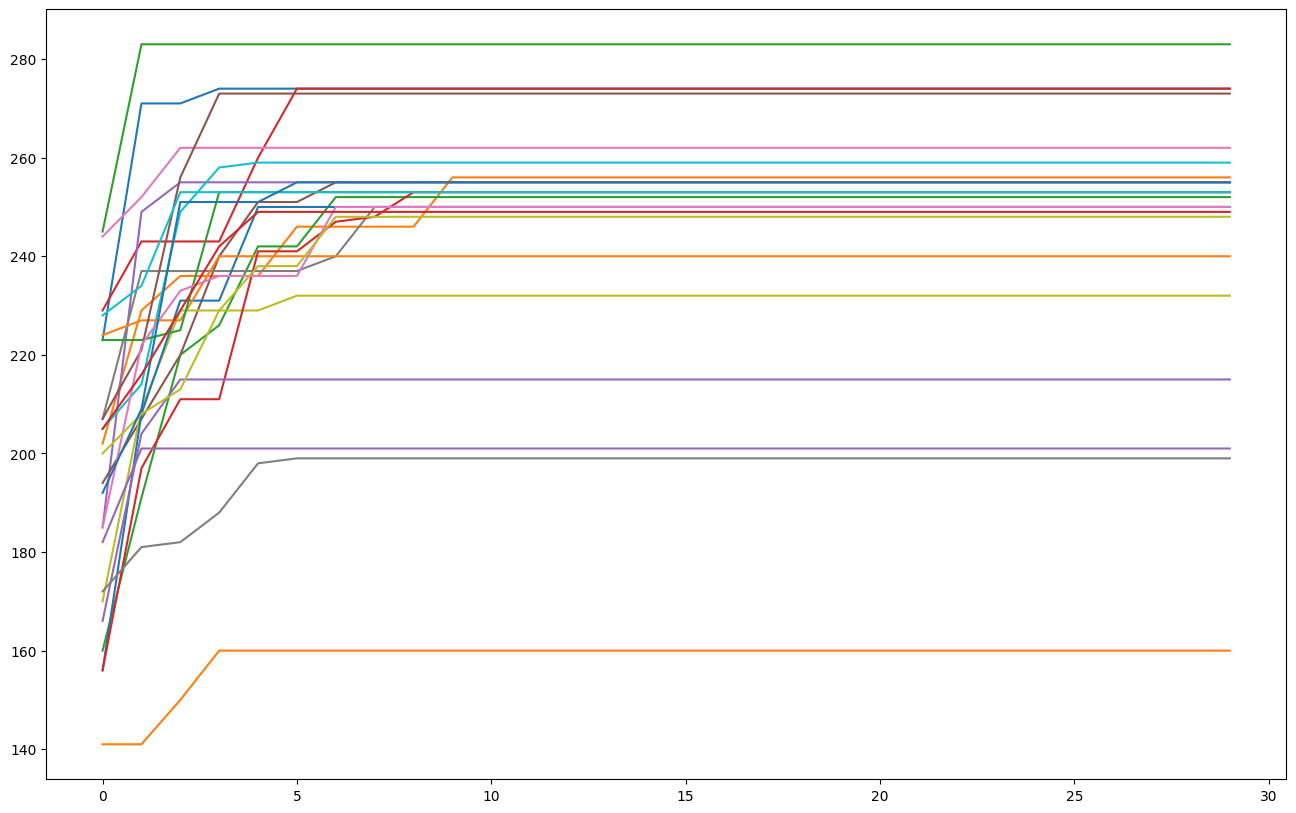

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
history_profit = np.loadtxt(f'results/TOPTW_PROCESSED/c_r_rc_100_100/history_profit.txt')

plt.figure(figsize = (16, 10))
for h in history_profit:
    plt.plot(h)
plt.show()

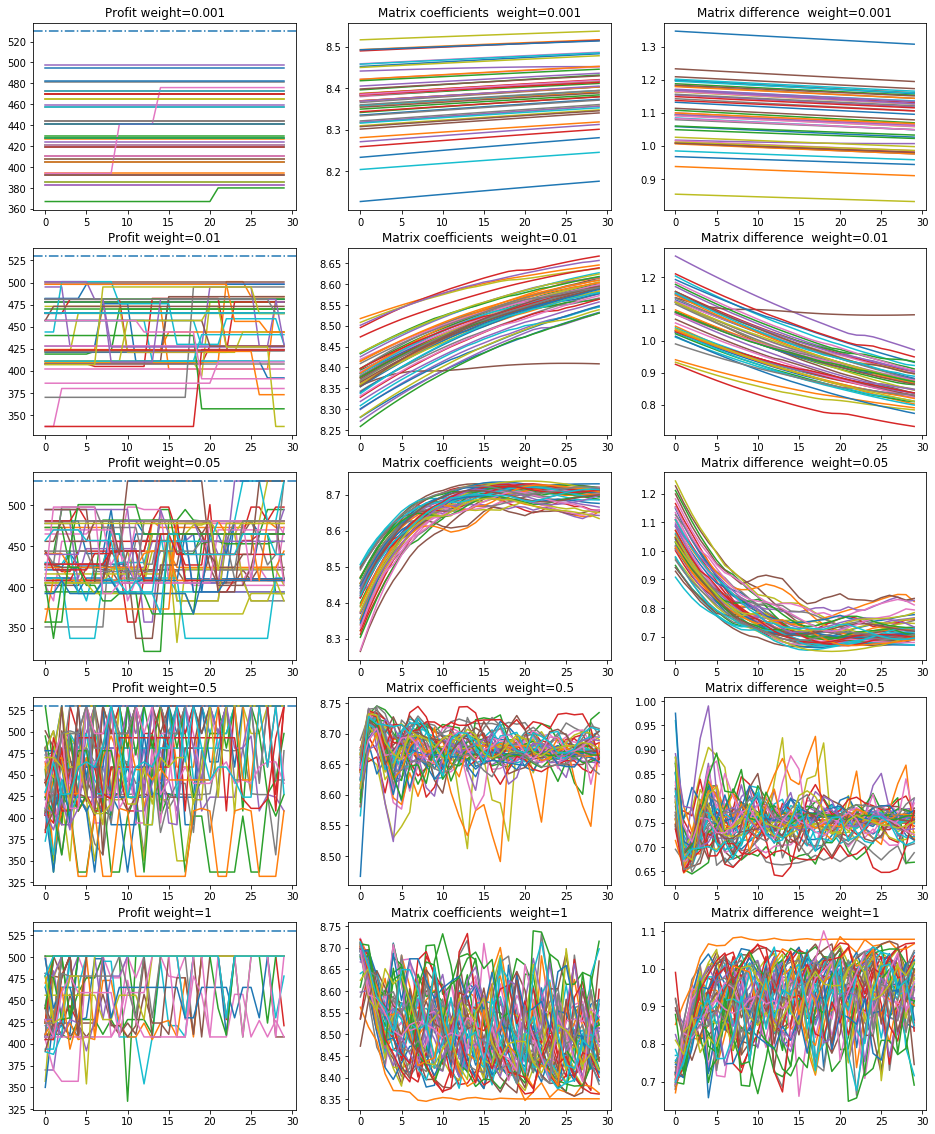

In [39]:
import matplotlib.pyplot as plt
import pickle
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
w = 0.1
for i, weight in enumerate((1e-3, 1e-2, 5e-2, 5e-1, 1)):
    history_profit = np.loadtxt(f'results/history_profit_npoints=10_w={w}_tmax=600_nparticles=50_vweight={weight}.txt')
    with open(f'results/history_matrix_npoints=10_w={w}_tmax=600_nparticles=50_vweight={weight}.pkl', 'rb') as f:
        history_matrix = pickle.load(f)
#     history_matrix = np.loadtxt(f'results/history_matrix_npoints=10_w=0.5_tmax=600_nparticles=50_vweight={weight}.txt')



    for h in history_profit:
        axes[i][0].plot(h)
#         axes[i][0].set_yticks(list(range(300, 600, 20)))
        axes[i][0].set_title(f'Profit weight={weight}')
    axes[i][0].axhline(530, xmin=0, xmax=30, linestyle = '-.')

    for h in history_matrix:
        coef = [(hmatrix * (1 - hmatrix)).sum() for hmatrix in h]
        diff = [np.linalg.norm(diff_matrix) for diff_matrix in np.diff(h)]
        axes[i][1].plot(coef)
#         axes[i][0].set_yticks(list(range(400, 500, 20)))
        axes[i][1].set_title(f'Matrix coefficients  weight={weight}')
        axes[i][2].plot(diff)
#         axes[i][0].set_yticks(list(range(400, 500, 20)))
        axes[i][2].set_title(f'Matrix difference  weight={weight}')
plt.show()

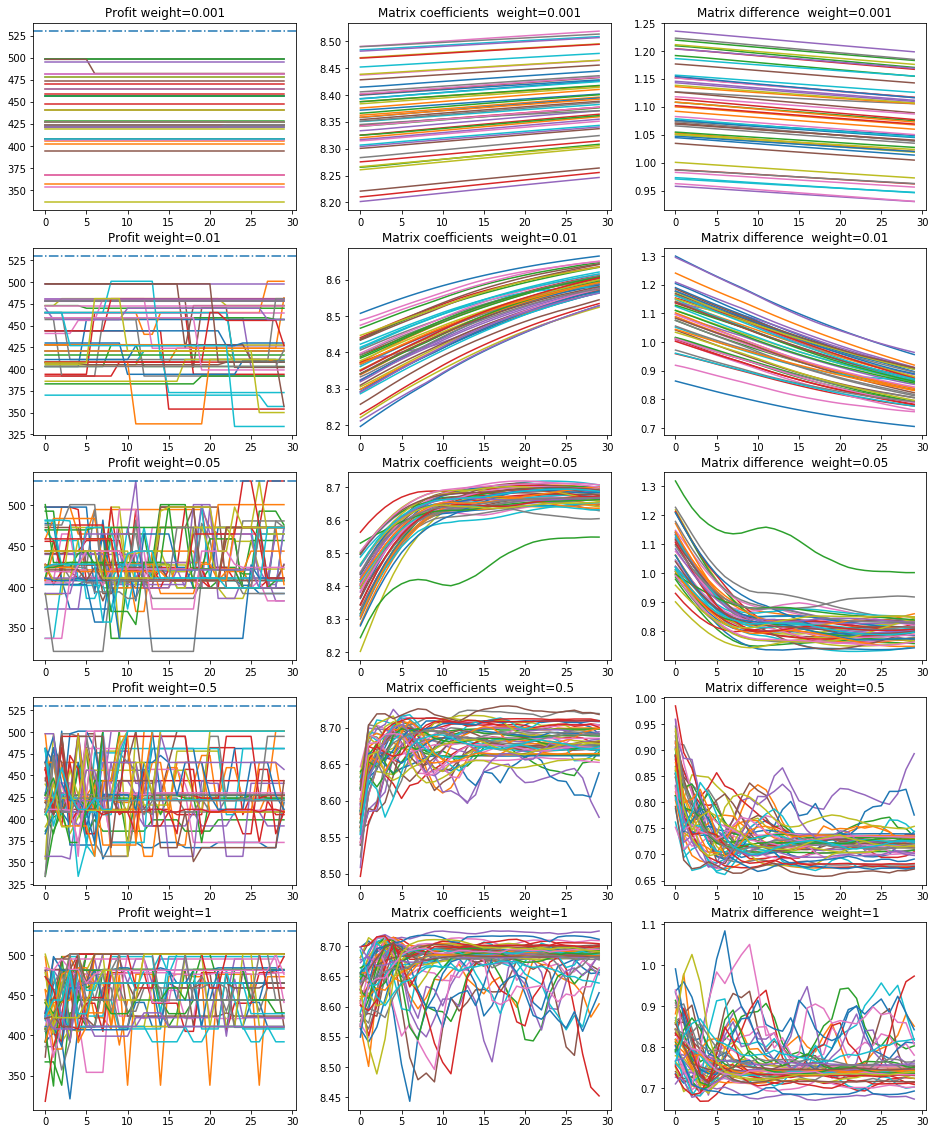

In [40]:
import matplotlib.pyplot as plt
import pickle
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
w = 0.5
for i, weight in enumerate((1e-3, 1e-2, 5e-2, 5e-1, 1)):
    history_profit = np.loadtxt(f'results/history_profit_npoints=10_w={w}_tmax=600_nparticles=50_vweight={weight}.txt')
    with open(f'results/history_matrix_npoints=10_w={w}_tmax=600_nparticles=50_vweight={weight}.pkl', 'rb') as f:
        history_matrix = pickle.load(f)
#     history_matrix = np.loadtxt(f'results/history_matrix_npoints=10_w=0.5_tmax=600_nparticles=50_vweight={weight}.txt')



    for h in history_profit:
        axes[i][0].plot(h)
#         axes[i][0].set_yticks(list(range(300, 600, 20)))
        axes[i][0].set_title(f'Profit weight={weight}')
    axes[i][0].axhline(530, xmin=0, xmax=30, linestyle = '-.')
    for h in history_matrix:
        coef = [(hmatrix * (1 - hmatrix)).sum() for hmatrix in h]
        diff = [np.linalg.norm(diff_matrix) for diff_matrix in np.diff(h)]
        axes[i][1].plot(coef)
#         axes[i][0].set_yticks(list(range(400, 500, 20)))
        axes[i][1].set_title(f'Matrix coefficients  weight={weight}')
        axes[i][2].plot(diff)
#         axes[i][0].set_yticks(list(range(400, 500, 20)))
        axes[i][2].set_title(f'Matrix difference  weight={weight}')
plt.show()

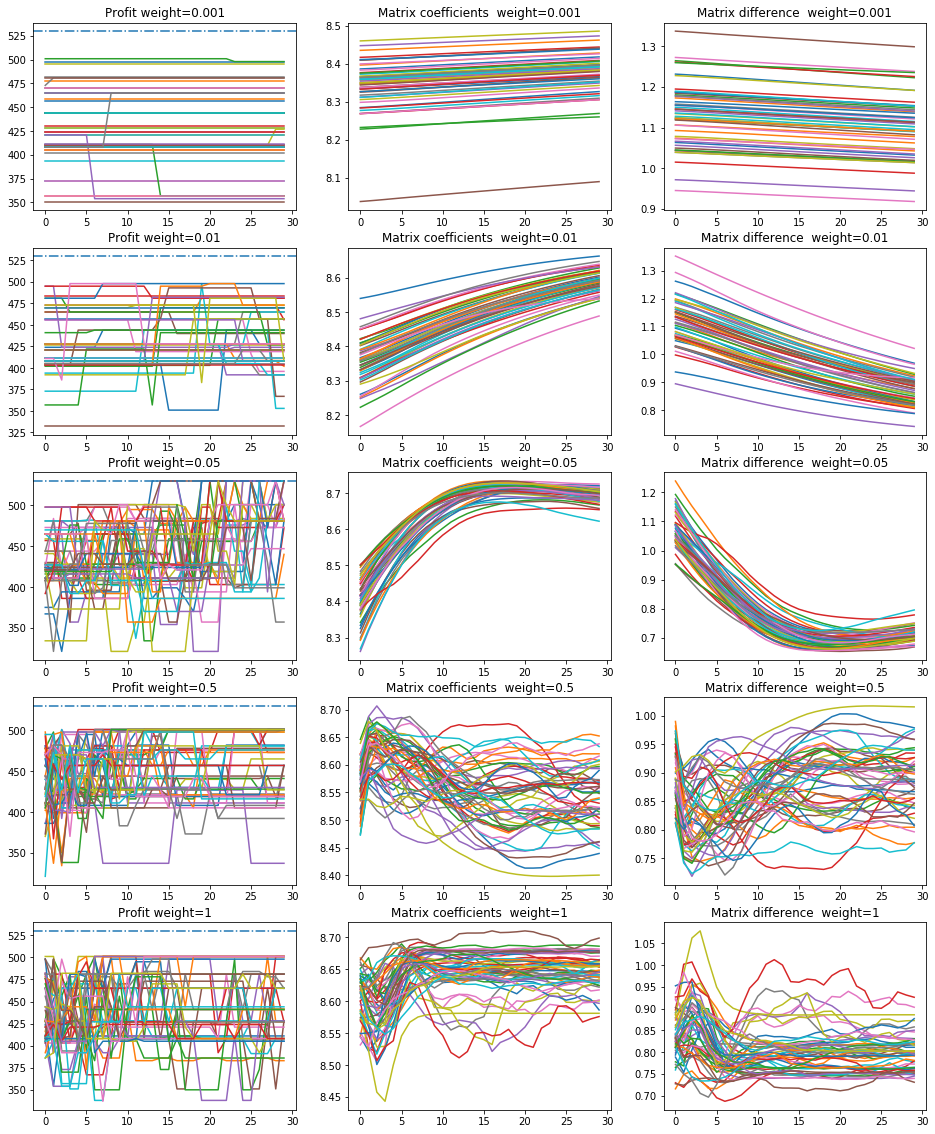

In [41]:
import matplotlib.pyplot as plt
import pickle
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
w = 1
for i, weight in enumerate((1e-3, 1e-2, 5e-2, 5e-1, 1)):
    history_profit = np.loadtxt(f'results/history_profit_npoints=10_w={w}_tmax=600_nparticles=50_vweight={weight}.txt')
    with open(f'results/history_matrix_npoints=10_w={w}_tmax=600_nparticles=50_vweight={weight}.pkl', 'rb') as f:
        history_matrix = pickle.load(f)
#     history_matrix = np.loadtxt(f'results/history_matrix_npoints=10_w=0.5_tmax=600_nparticles=50_vweight={weight}.txt')



    for h in history_profit:
        axes[i][0].plot(h)
#         axes[i][0].set_yticks(list(range(300, 600, 20)))
        axes[i][0].set_title(f'Profit weight={weight}')
    axes[i][0].axhline(530, xmin=0, xmax=30, linestyle = '-.')
    for h in history_matrix:
        coef = [(hmatrix * (1 - hmatrix)).sum() for hmatrix in h]
        diff = [np.linalg.norm(diff_matrix) for diff_matrix in np.diff(h)]
        axes[i][1].plot(coef)
#         axes[i][0].set_yticks(list(range(400, 500, 20)))
        axes[i][1].set_title(f'Matrix coefficients  weight={weight}')
        axes[i][2].plot(diff)
#         axes[i][0].set_yticks(list(range(400, 500, 20)))
        axes[i][2].set_title(f'Matrix difference  weight={weight}')
plt.show()

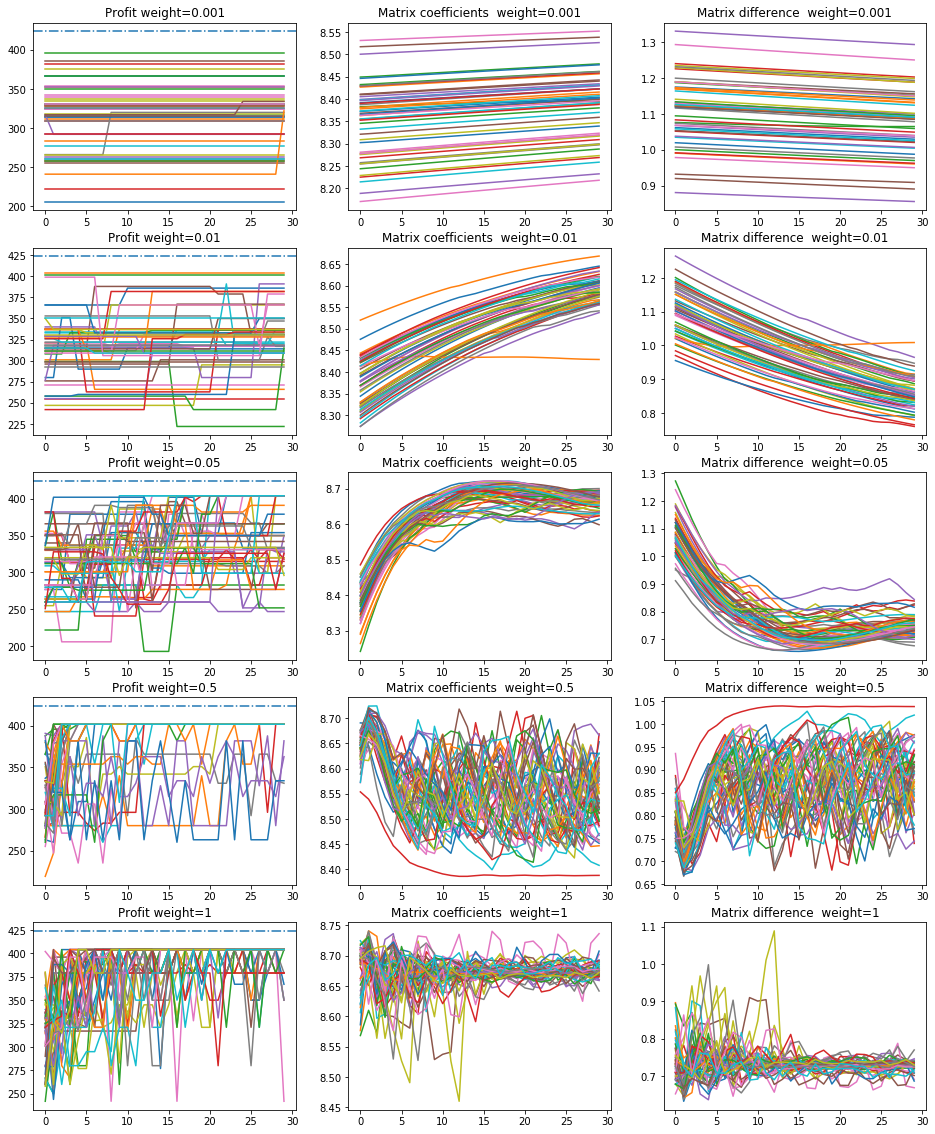

In [37]:
import matplotlib.pyplot as plt
import pickle
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
w = 0.1
t_max = 450
for i, weight in enumerate((1e-3, 1e-2, 5e-2, 5e-1, 1)):
    history_profit = np.loadtxt(f'results/history_profit_npoints=10_w={w}_tmax={t_max}_nparticles=50_vweight={weight}.txt')
    with open(f'results/history_matrix_npoints=10_w={w}_tmax={t_max}_nparticles=50_vweight={weight}.pkl', 'rb') as f:
        history_matrix = pickle.load(f)
#     history_matrix = np.loadtxt(f'results/history_matrix_npoints=10_w=0.5_tmax=600_nparticles=50_vweight={weight}.txt')



    for h in history_profit:
        axes[i][0].plot(h)
#         axes[i][0].set_yticks(list(range(300, 600, 20)))
        axes[i][0].set_title(f'Profit weight={weight}')
    axes[i][0].axhline(424, xmin=0, xmax=30, linestyle = '-.')

    for h in history_matrix:
        coef = [(hmatrix * (1 - hmatrix)).sum() for hmatrix in h]
        diff = [np.linalg.norm(diff_matrix) for diff_matrix in np.diff(h)]
        axes[i][1].plot(coef)
#         axes[i][0].set_yticks(list(range(400, 500, 20)))
        axes[i][1].set_title(f'Matrix coefficients  weight={weight}')
        axes[i][2].plot(diff)
#         axes[i][0].set_yticks(list(range(400, 500, 20)))
        axes[i][2].set_title(f'Matrix difference  weight={weight}')
plt.show()

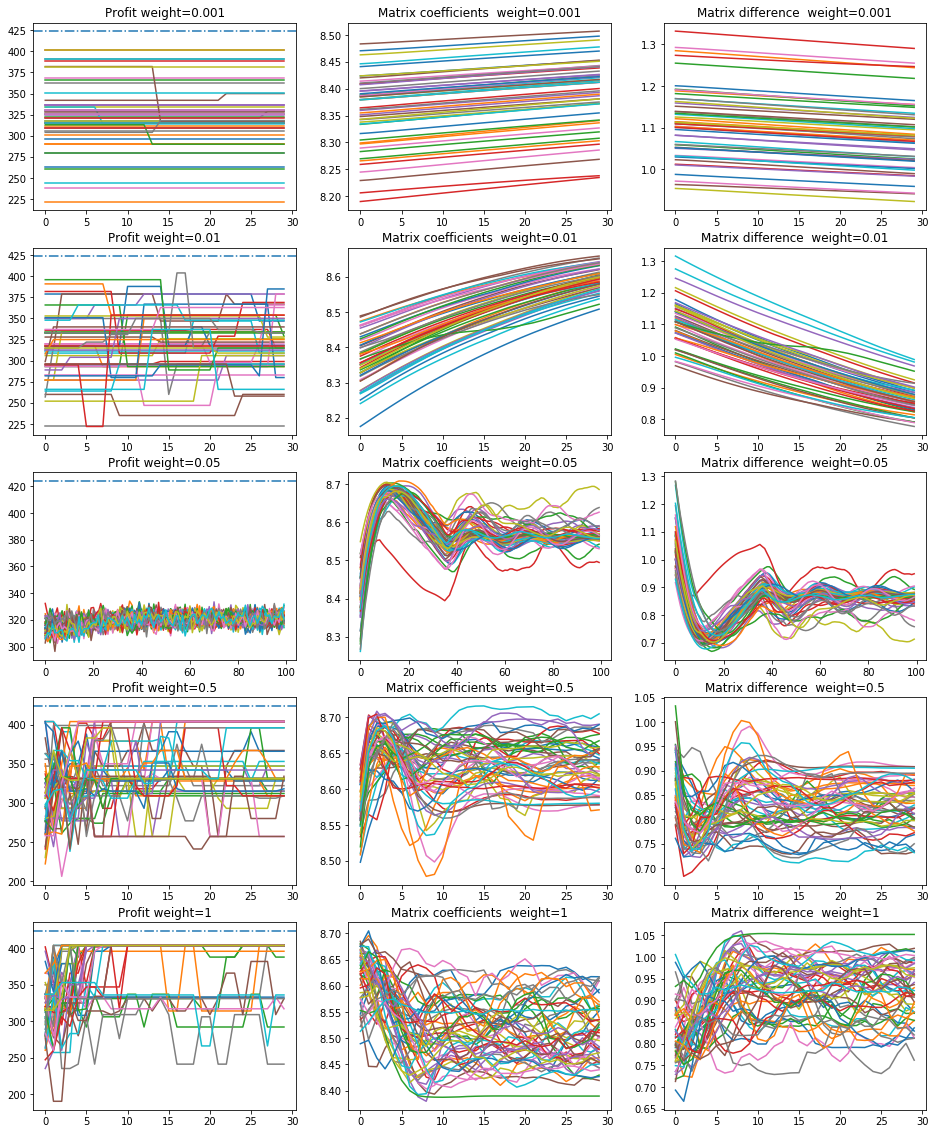

In [3]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
w = 0.5
t_max = 450
for i, weight in enumerate((1e-3, 1e-2, 5e-2, 5e-1, 1)):
    history_profit = np.loadtxt(f'results/history_profit_npoints=10_w={w}_tmax={t_max}_nparticles=50_vweight={weight}.txt')
    with open(f'results/history_matrix_npoints=10_w={w}_tmax={t_max}_nparticles=50_vweight={weight}.pkl', 'rb') as f:
        history_matrix = pickle.load(f)
#     history_matrix = np.loadtxt(f'results/history_matrix_npoints=10_w=0.5_tmax=600_nparticles=50_vweight={weight}.txt')



    for h in history_profit:
        axes[i][0].plot(h)
#         axes[i][0].set_yticks(list(range(300, 600, 20)))
        axes[i][0].set_title(f'Profit weight={weight}')
    axes[i][0].axhline(424, xmin=0, xmax=30, linestyle = '-.')
    for h in history_matrix:
        coef = [(hmatrix * (1 - hmatrix)).sum() for hmatrix in h]
        diff = [np.linalg.norm(diff_matrix) for diff_matrix in np.diff(h)]
        axes[i][1].plot(coef)
#         axes[i][0].set_yticks(list(range(400, 500, 20)))
        axes[i][1].set_title(f'Matrix coefficients  weight={weight}')
        axes[i][2].plot(diff)
#         axes[i][0].set_yticks(list(range(400, 500, 20)))
        axes[i][2].set_title(f'Matrix difference  weight={weight}')
plt.show()

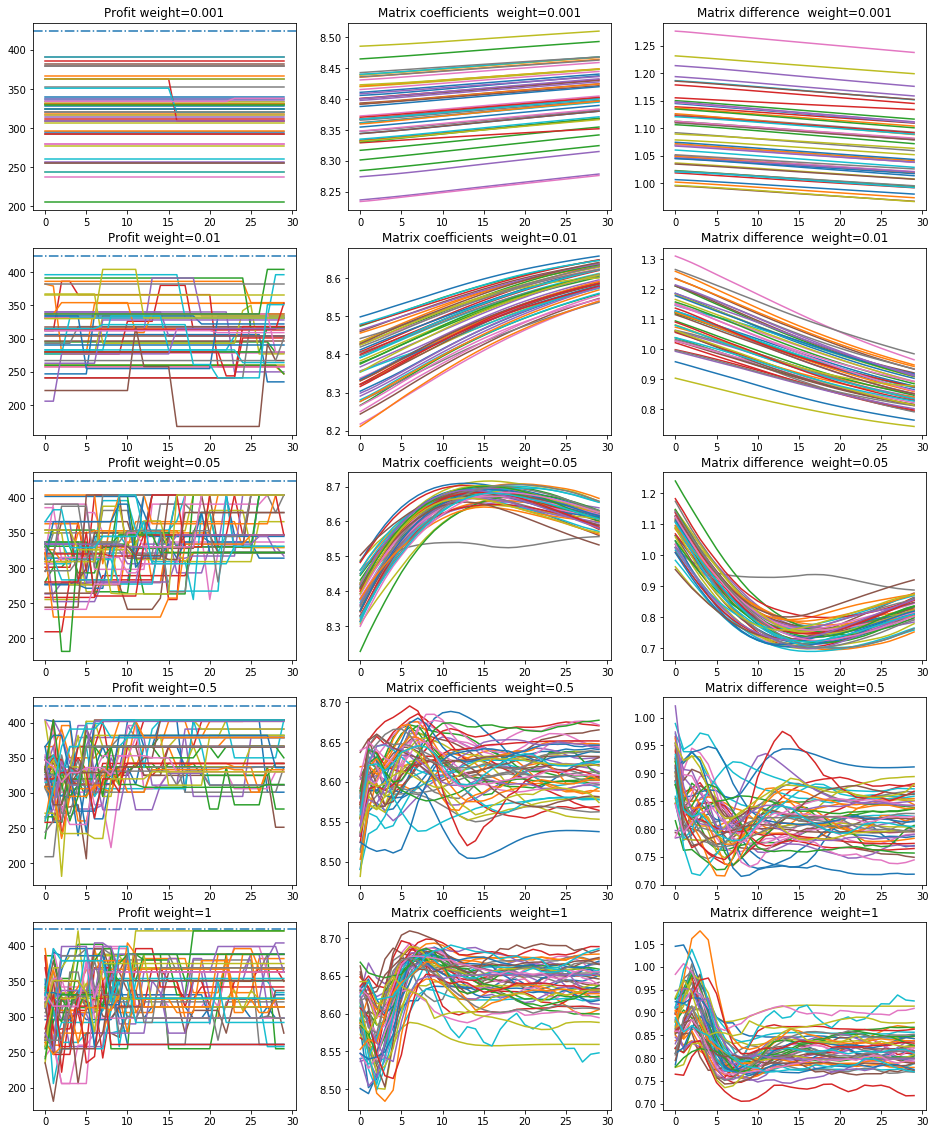

In [38]:
import matplotlib.pyplot as plt
import pickle
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 20))
w = 1
t_max = 450
for i, weight in enumerate((1e-3, 1e-2, 5e-2, 5e-1, 1)):
    history_profit = np.loadtxt(f'results/history_profit_npoints=10_w={w}_tmax={t_max}_nparticles=50_vweight={weight}.txt')
    with open(f'results/history_matrix_npoints=10_w={w}_tmax={t_max}_nparticles=50_vweight={weight}.pkl', 'rb') as f:
        history_matrix = pickle.load(f)
#     history_matrix = np.loadtxt(f'results/history_matrix_npoints=10_w=0.5_tmax=600_nparticles=50_vweight={weight}.txt')



    for h in history_profit:
        axes[i][0].plot(h)
#         axes[i][0].set_yticks(list(range(300, 600, 20)))
        axes[i][0].set_title(f'Profit weight={weight}')
    axes[i][0].axhline(424, xmin=0, xmax=30, linestyle = '-.')

    for h in history_matrix:
        coef = [(hmatrix * (1 - hmatrix)).sum() for hmatrix in h]
        diff = [np.linalg.norm(diff_matrix) for diff_matrix in np.diff(h)]
        axes[i][1].plot(coef)
#         axes[i][0].set_yticks(list(range(400, 500, 20)))
        axes[i][1].set_title(f'Matrix coefficients  weight={weight}')
        axes[i][2].plot(diff)
#         axes[i][0].set_yticks(list(range(400, 500, 20)))
        axes[i][2].set_title(f'Matrix difference  weight={weight}')
plt.show()